<a href="https://colab.research.google.com/github/anshajk/ik-classes/blob/main/assignment-sol-30th-aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

You are required to perform a comprehensive exploratory data analysis (EDA) and visualization on a dataset comprising 1,825 coding problems sourced from LeetCode. The dataset includes various attributes such as problem titles, descriptions, difficulty levels, acceptance rates, associated companies, and community feedback (likes, dislikes, and discussion counts).



---



**Leeetcode Dataset:** [Leetcode Dataset](https://drive.google.com/file/d/1y6Wj2ddKM-YL5Y1xFcZ4In_6oW1WK8PR/view?usp=sharing)

The dataset contains information about various coding problems from LeetCode, with a total of 1,825 entries and 19 columns. Key columns include:

- **id**: problem id
- **title**: problem name
- **description**: problem description
- **is_premium**: whether the questions requires a premium account
- **difficulty**: easy, medium, or hard
- **solution_link**: how often the answer submitted is correct
- **acceptance_rate**: how often the answer submitted is correct
- **frequency**: how often the problem is attempted
- **url**: url to the problem
- **discuss_count**: how many comments are submitted by users
- **accepted**: how many times the answer was accepted
- **submissions**: how many times the answer was submitted
- **companies**: which companies were tagged as having asked this specific problem
- **related_topics**: related topics to the current problem
- **likes**: how many likes the problem got
- **dislikes**: how many dislikes the problem got
- **rating**: likes / (likes + dislikes)
- **asked_by_faang**: whether or not the question was asked by facebook, apple, amazon, google, or netflix
- **similar_questions**: similar problems with problem name, slug, and difficulty



In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This line ensures that plots appear directly in the notebook
%matplotlib inline

## Load Dataset

In [2]:
# Importing CSV file from local device

from google.colab import files
leetcode_dataset = files.upload()

MessageError: RangeError: Maximum call stack size exceeded.

In [5]:
leetcode_df = pd.read_csv("leetcode_dataset.csv")

## Data Exploration

In [6]:
leetcode_df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


##Question 1
####What is the Shape of the dataset?

In [8]:
#Solution 1(your code here)
rows, cols = leetcode_df.shape
print(rows, cols)

1825 19


In [ ]:
leetcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      987 non-null    object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   object 
 11  submissions        1825 non-null   object 
 12  companies          1749 non-null   object 
 13  related_topics     1571 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

## Observations

- Number of Entries: There are 1825 entries (rows) in the dataset.
- Data Types: The dataset consists of:
  - 7 columns of type int64 (integer).
  - 2 columns of type float64 (floating-point).
  - 10 columns of type object (strings).
- Non-Null Counts:
  - Most columns have 1825 non-null entries, indicating no missing values.
  - The solution_link column has 987 non-null entries, implying that solutions are available for only some problems.
  - The companies column has 1749 non-null entries, indicating some missing values.
  - The related_topics column has 1571 non-null entries, indicating some missing values.
  - The similar_questions column has 745 non-null entries, indicating that only a subset of problems has similar questions listed.
- Column Details:
  - id, title, description, is_premium, difficulty, acceptance_rate, frequency, url, discuss_count, accepted, submissions, companies, related_topics, likes, dislikes, rating, asked_by_faang, and similar_questions are the columns in the dataset.
  - id, is_premium, discuss_count, likes, dislikes, rating, and asked_by_faang are integers.
  - acceptance_rate and frequency are floating-point numbers.
  title, description, difficulty, solution_link, url, accepted, submissions, companies, related_topics, and similar_questions are objects (strings).

##Question 2
####What is the datatype of **accepted**, **submissions** and **acceptance rate** fields?

Think: What point should be noted here? Do all columns have the proper datatype?

In [9]:
#Solution 2(your code here)

leetcode_df[["accepted", "acceptance_rate", "submissions"]].dtypes

,0
accepted,object
acceptance_rate,float64
submissions,object


##Question 3
####What is the number of missing values corresponding to each field?

In [10]:
#Solution 3(your code here)
#number of missing values corresponding to each field
leetcode_df.isnull().sum()

,0
id,0
title,0
description,0
is_premium,0
difficulty,0
solution_link,838
acceptance_rate,0
frequency,0
url,0
discuss_count,0


## Observation
- Columns with No Missing Values:
  - id
  - title
  - description
  - is_premium
  - difficulty
  - acceptance_rate
  - frequency
  - url
  - discuss_count
  - accepted
  - submissions
  - likes
  - dislikes
  - rating
  - asked_by_faang
- Columns with Missing Values:
  - solution_link has 838 missing values.
  - companies has 76 missing values.
  - related_topics has 254 missing values.
  - similar_questions has 1080 missing values.
- Key Observations:
  - The solution_link column has a significant number of missing values (838 out of 1825), indicating that solutions are not available for all problems.
  - The companies column has relatively fewer missing values (76 out of 1825).
  - The related_topics column has a moderate number of missing values (254 out of 1825).
  - The similar_questions column has the highest number of missing values (1080 out of 1825), indicating that similar questions are not identified for the majority of problems.

In [12]:
#%age of missing values corresponding to each field
leetcode_df.isnull().sum()/leetcode_df.shape[0]

,0
id,0.000000
title,0.000000
description,0.000000
is_premium,0.000000
difficulty,0.000000
solution_link,45.917808
acceptance_rate,0.000000
frequency,0.000000
url,0.000000
discuss_count,0.000000


##Question 4
####What is the cardinality of the columns?

In [13]:
#Solution 4(your code here)

leetcode_df.nunique()

,0
id,1825
title,1825
description,1670
is_premium,2
difficulty,3
solution_link,987
acceptance_rate,576
frequency,619
url,1825
discuss_count,642


### Summary Statistics


The dataset has 1825 entries with the following insights:
- Acceptance Rate: Mean of 53.14% with a range from 13.9% to 95.6%.
- Frequency: Mean of 21.11, with a range from 0 to 100.
- Accepted Submissions: Mean of approximately 120,139 accepted submissions.
- Total Submissions: Mean of approximately 260,147 total submissions.
- Likes and Dislikes: Average likes of 1050.53 and average dislikes of 279.01.
- Rating: Mean rating of 77.39.
- Asked by FAANG: 67.1% of the problems have been asked by FAANG companies.

In [14]:
leetcode_df.describe()

,id,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.139616,21.113041,421.435068,1050.534795,279.010959,77.391233,0.671233
std,526.976438,0.413057,14.778411,22.364741,330.583617,1512.674013,608.489206,23.317515,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,2.000000,0.000000,7.000000,0.000000
25%,457.000000,0.000000,42.400000,3.100000,150.000000,217.000000,32.000000,67.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,516.000000,92.000000,88.000000,1.000000
75%,1369.000000,0.000000,62.800000,31.800000,663.000000,1200.000000,239.000000,95.000000,1.000000
max,1825.000000,1.000000,95.600000,100.000000,999.000000,20217.000000,8900.000000,100.000000,1.000000


##Question 5
####Give 2 inferences from the .describe() of the dataset.

In [15]:
#Solution 5(your code here)

# Inference 1: Show only numerical with [10, 30, 60] percentiles
leetcode_df.describe(include='number', percentiles=[0.1, 0.3, 0.6])

,id,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.139616,21.113041,421.435068,1050.534795,279.010959,77.391233,0.671233
std,526.976438,0.413057,14.778411,22.364741,330.583617,1512.674013,608.489206,23.317515,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,2.000000,0.000000,7.000000,0.000000
10%,183.400000,0.000000,35.200000,0.000000,82.000000,89.400000,11.000000,36.000000,0.000000
30%,548.200000,0.000000,44.220000,4.500000,177.000000,259.000000,40.000000,75.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,516.000000,92.000000,88.000000,1.000000
60%,1095.400000,0.000000,55.800000,20.040000,396.400000,698.400000,135.000000,91.000000,1.000000
max,1825.000000,1.000000,95.600000,100.000000,999.000000,20217.000000,8900.000000,100.000000,1.000000


In [16]:
# Inference 2: Show only categoricals/strings
leetcode_df.describe(include='object')

,title,description,difficulty,solution_link,url,accepted,submissions,companies,related_topics,similar_questions
count,1825,1825,1825,987,1825,1825,1825,1749,1571,745
unique,1825,1670,3,987,1825,1098,1236,691,320,689
top,Two Sum,SQL Schema,Medium,/articles/two-sum,https://leetcode.com/problems/two-sum,2.1K,1.2M,Google,Array,"[Stone Game V, /problems/stone-game-v/, Hard],..."
freq,1,156,963,1,1,8,16,257,134,4


### Question 6

#### Handle the missing values in the columns

In [17]:
#Solution 6(your code here)
leetcode_df['solution_link'].fillna('Unknown', inplace=True)
leetcode_df['companies'].fillna('Unknown', inplace=True)
leetcode_df['related_topics'].fillna('Unknown', inplace=True)
leetcode_df['similar_questions'].fillna('Unknown', inplace=True)

In [18]:
leetcode_df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,Unknown
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [19]:
# Verify changes
leetcode_df.isnull().sum()

,0
id,0
title,0
description,0
is_premium,0
difficulty,0
solution_link,0
acceptance_rate,0
frequency,0
url,0
discuss_count,0


### Question 7

#### Convert the datatypes for **accepted** and **submissions** columns

In [20]:
#Solution 7(your code here)
# Convert 'accepted' and 'submissions' to numeric types
leetcode_df['accepted'] = leetcode_df['accepted'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
leetcode_df['submissions'] = leetcode_df['submissions'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

In [21]:
leetcode_df[["accepted", "submissions"]].dtypes

,0
accepted,float64
submissions,float64


In [22]:
# Verify changes
leetcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1825 non-null   int64  
 1   title              1825 non-null   object 
 2   description        1825 non-null   object 
 3   is_premium         1825 non-null   int64  
 4   difficulty         1825 non-null   object 
 5   solution_link      1825 non-null   object 
 6   acceptance_rate    1825 non-null   float64
 7   frequency          1825 non-null   float64
 8   url                1825 non-null   object 
 9   discuss_count      1825 non-null   int64  
 10  accepted           1825 non-null   float64
 11  submissions        1825 non-null   float64
 12  companies          1825 non-null   object 
 13  related_topics     1825 non-null   object 
 14  likes              1825 non-null   int64  
 15  dislikes           1825 non-null   int64  
 16  rating             1825 

In [24]:
leetcode_df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4100000.0,8700000.0,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1900000.0,5200000.0,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2100000.0,6700000.0,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904700.0,2900000.0,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,Unknown
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1300000.0,4100000.0,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


## Question 8

#### Find if duplicates exist based on **id** and **title**

In [25]:
#Solution 8(your code here)
# Checking for duplicate id
duplicate_id = leetcode_df.duplicated(subset=['id'], keep=False)
print("Number of duplicate entries:", duplicate_id.sum())
print("Duplicate entries:", leetcode_df[duplicate_id])

Number of duplicate entries: 0
Duplicate entries: Empty DataFrame
Columns: [id, title, description, is_premium, difficulty, solution_link, acceptance_rate, frequency, url, discuss_count, accepted, submissions, companies, related_topics, likes, dislikes, rating, asked_by_faang, similar_questions]
Index: []


In [26]:
# Checking for duplicate title
duplicate_title = leetcode_df.duplicated(subset=['title'], keep=False)
print("Number of duplicate entries:", duplicate_title.sum())
print("Duplicate entries:", leetcode_df[duplicate_title])

Number of duplicate entries: 0
Duplicate entries: Empty DataFrame
Columns: [id, title, description, is_premium, difficulty, solution_link, acceptance_rate, frequency, url, discuss_count, accepted, submissions, companies, related_topics, likes, dislikes, rating, asked_by_faang, similar_questions]
Index: []


##Question 9
#### Plot the outliers in the dataset.

<Axes: >

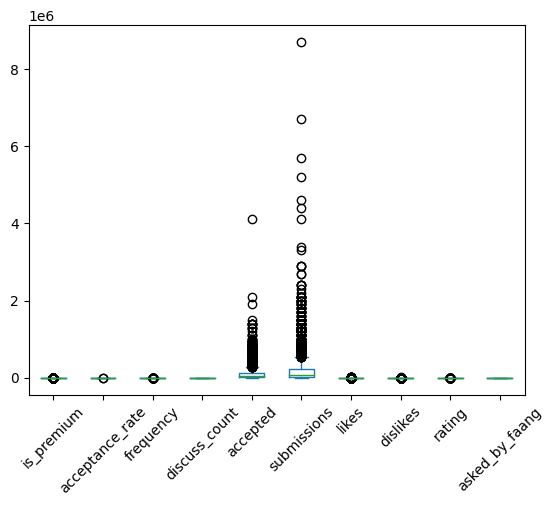

In [27]:
#Solution 9(your code here)
# (Hint: select only numbers using .select_dtypes() and .plot as a 'box' plot with 45deg rotation)

leetcode_df.select_dtypes(include='number').drop(["id"], axis=1).plot(kind='box', rot=45)

From the box plot of the numeric columns in the dataset (excluding the 'id' column), we can make the following inferences and observations:

- Acceptance Rate and Frequency:
  - The acceptance_rate and frequency columns have values within a reasonable range, with some outliers.
  - The acceptance rate varies widely but generally falls below 50%.
- Discuss Count:
  - The discuss_count column has a high range with some extreme outliers, indicating that a few problems have significantly more discussions than others.
- Likes and Dislikes:
  - The likes column shows a wide range of values with some extreme outliers, suggesting that a few problems are much more liked than the rest.
  - The dislikes column also shows a range of values with fewer outliers compared to likes.
- Rating:
  - The rating column has values clustered around a specific range with fewer outliers, indicating most problems have similar ratings.
- Data Distribution:
  - The box plots for acceptance_rate, frequency, discuss_count, likes, dislikes, and rating show that the data in these columns is not uniformly distributed and contains several outliers.

### Question 10

#### Identify and plot the outliers for the numeric columns

In [28]:
#Solution 10(your code here)
import numpy as np

# Select the numeric columns for outlier detection
numeric_columns = ['acceptance_rate', 'frequency', 'likes', 'dislikes', 'rating', 'accepted', 'submissions']

# Calculate IQR for each numeric column
Q1 = leetcode_df[numeric_columns].quantile(0.25)
Q3 = leetcode_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def identify_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return leetcode_df[(leetcode_df[column] < lower_bound) | (leetcode_df[column] > upper_bound)]

# Identify outliers for each numeric column
outliers = {col: identify_outliers(col) for col in numeric_columns}

# Display the outliers found in each numeric column
outliers_summary = {col: outliers[col][['id', col]] for col in numeric_columns if not outliers[col].empty}


In [29]:
outliers_summary['acceptance_rate']

,id,acceptance_rate
1264,1265,94.3
1756,1757,95.6


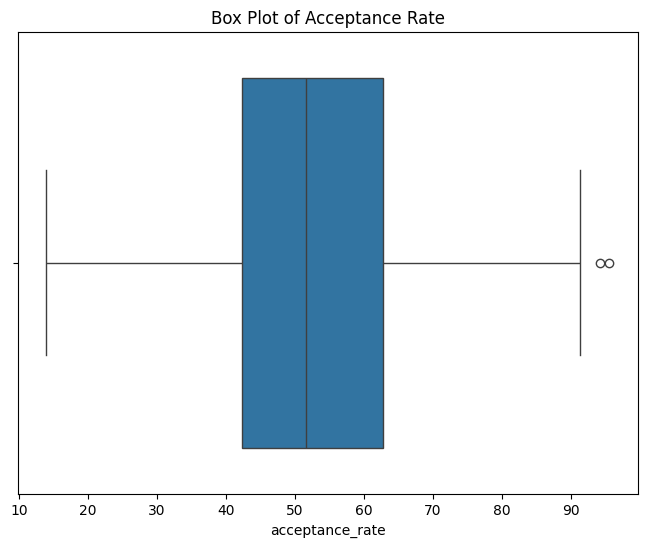

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for acceptance_rate
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['acceptance_rate'])
plt.title('Box Plot of Acceptance Rate')
plt.show()


In [31]:
outliers_summary['frequency']

,id,frequency
0,1,100.0
1,2,93.1
2,3,90.9
3,4,86.2
4,5,84.7
...,...,...
1234,1235,82.7
1248,1249,84.5
1334,1335,93.7
1347,1348,78.7


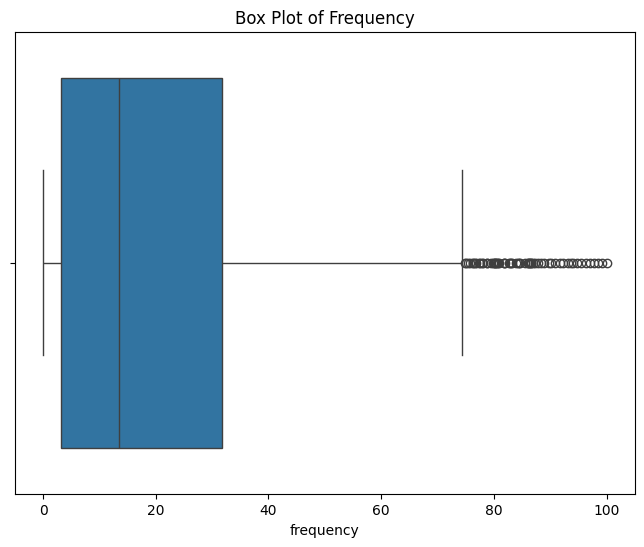

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['frequency'])
plt.title('Box Plot of Frequency')
plt.show()

In [33]:
outliers_summary['likes']

,id,likes
0,1,20217
1,2,11350
2,3,13810
3,4,9665
4,5,10271
...,...,...
862,863,3408
972,973,2901
982,983,2676
993,994,3211


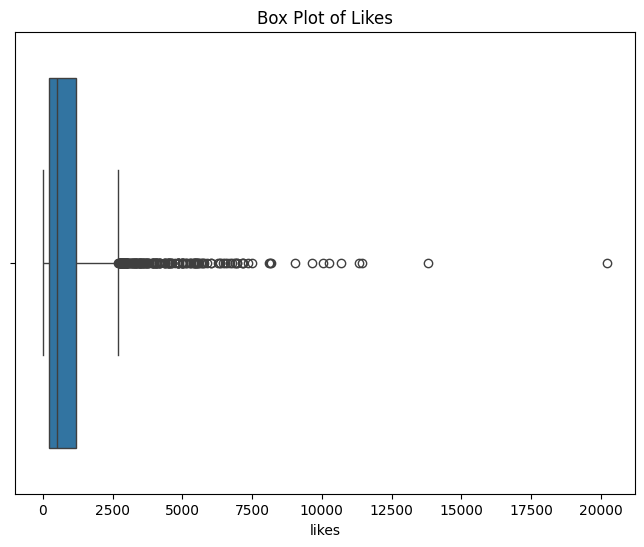

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Likes
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['likes'])
plt.title('Box Plot of Likes')
plt.show()

In [35]:
outliers_summary['dislikes']

,id,dislikes
0,1,712
1,2,2704
2,3,714
3,4,1486
4,5,670
...,...,...
1378,1379,601
1384,1385,694
1388,1389,655
1533,1534,584


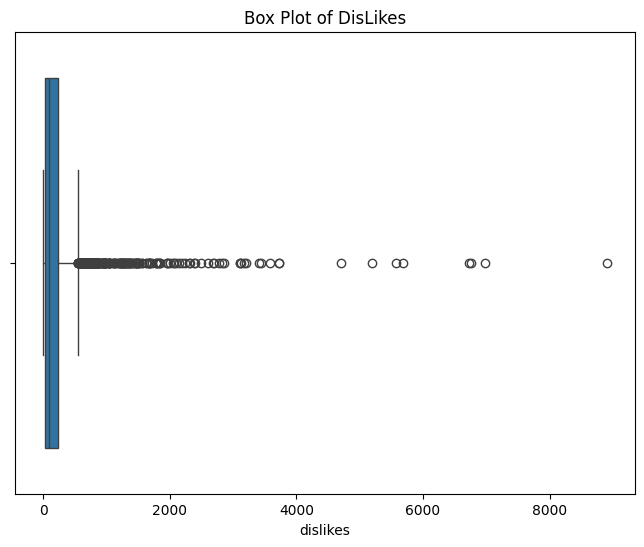

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for DisLikes
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['dislikes'])
plt.title('Box Plot of DisLikes')
plt.show()

In [37]:
outliers_summary['rating']

,id,rating
28,29,20
37,38,22
64,65,14
155,156,24
156,157,14
...,...,...
1598,1599,22
1619,1620,22
1636,1637,23
1655,1656,12


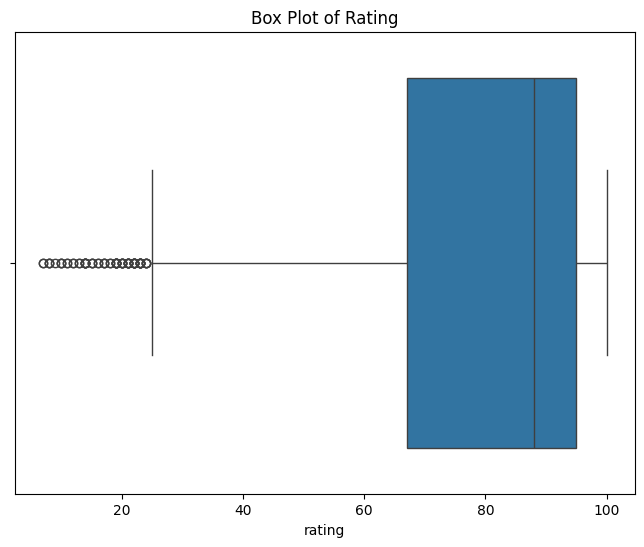

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [43]:
outliers_summary['accepted'].sort_values('accepted')

,id,accepted
133,134,279500.0
136,137,282300.0
414,415,282500.0
122,123,284200.0
843,844,285000.0
...,...,...
205,206,1400000.0
6,7,1500000.0
1,2,1900000.0
2,3,2100000.0


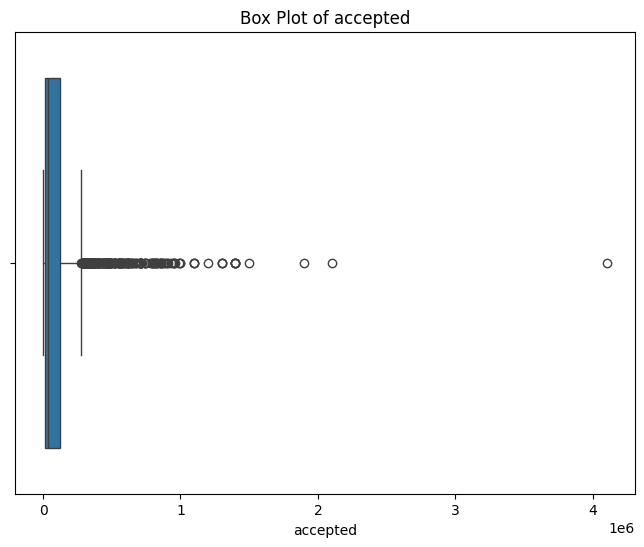

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for accepted
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['accepted'])
plt.title('Box Plot of accepted')
plt.show()

In [44]:
outliers_summary['submissions']

,id,submissions
0,1,8700000.0
1,2,5200000.0
2,3,6700000.0
3,4,2900000.0
4,5,4100000.0
...,...,...
679,680,683700.0
770,771,703900.0
843,844,604400.0
972,973,689300.0


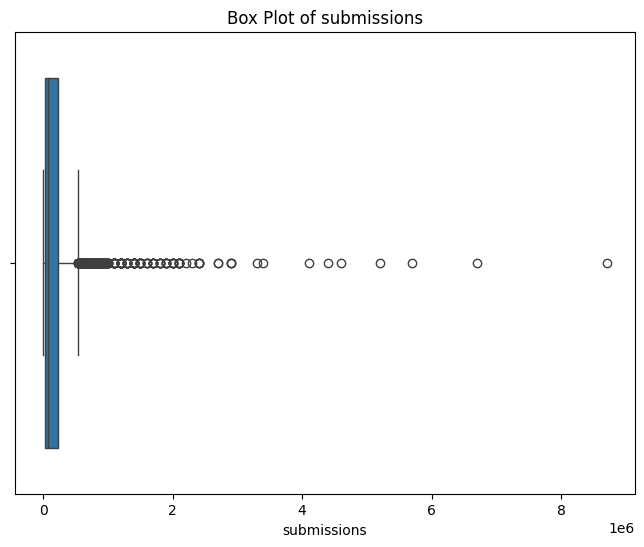

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for submissions
plt.figure(figsize=(8, 6))
sns.boxplot(x=leetcode_df['submissions'])
plt.title('Box Plot of submissions')
plt.show()

### Question 11

#### Handle the outliers

In [46]:
#Solution 11(your code here)
def cap_and_floor(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

numeric_columns = ['acceptance_rate', 'frequency', 'likes', 'dislikes', 'rating', 'accepted', 'submissions']

# Apply the function to each column with detected outliers
capped_dataset = leetcode_df.copy()
for column in numeric_columns:
    capped_dataset = cap_and_floor(capped_dataset, column)

capped_dataset.describe()

,id,is_premium,acceptance_rate,frequency,discuss_count,accepted,submissions,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.137918,20.768603,421.435068,82832.127123,161664.942466,851.575068,171.312877,77.669589,0.671233
std,526.976438,0.413057,14.773675,21.399161,330.583617,92839.247454,181837.013139,846.233977,183.551617,22.614714,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,305.000000,343.000000,2.000000,0.000000,25.000000,0.000000
25%,457.000000,0.000000,42.400000,3.100000,150.000000,15000.000000,28700.000000,217.000000,32.000000,67.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,37900.000000,72000.000000,516.000000,92.000000,88.000000,1.000000
75%,1369.000000,0.000000,62.800000,31.800000,663.000000,120600.000000,230500.000000,1200.000000,239.000000,95.000000,1.000000
max,1825.000000,1.000000,93.400000,74.850000,999.000000,279000.000000,533200.000000,2674.500000,549.500000,100.000000,1.000000


##Question 12

####Plot top 20 companies whose problems are listed in this dataset.

In [48]:
leetcode_df.head()

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4100000.0,8700000.0,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1900000.0,5200000.0,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2100000.0,6700000.0,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904700.0,2900000.0,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,Unknown
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1300000.0,4100000.0,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [50]:
leetcode_df['companies'].value_counts().head(20)

,count
companies,
Google,257
Amazon,224
Facebook,101
Unknown,76
Microsoft,65
Bloomberg,32
Uber,25
Apple,22
"Google,Amazon",16


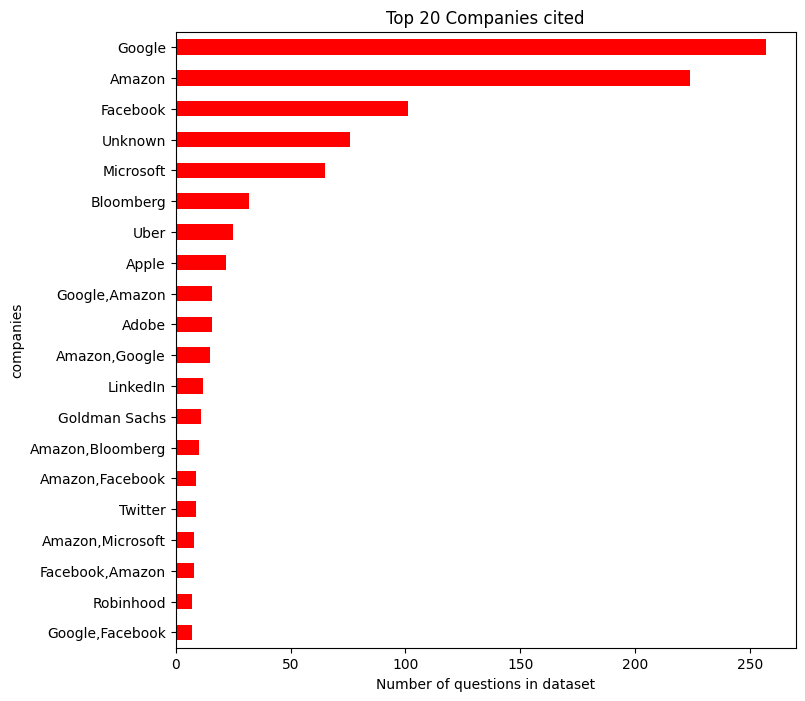

In [49]:
#Solution 12(your code here)
plt.figure(figsize=(8,8))
leetcode_df['companies'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh', color ='red', title="Top 20 Companies cited")
plt.xlabel("Number of questions in dataset");

### Question 13
#### Plot Distribution of difficulty

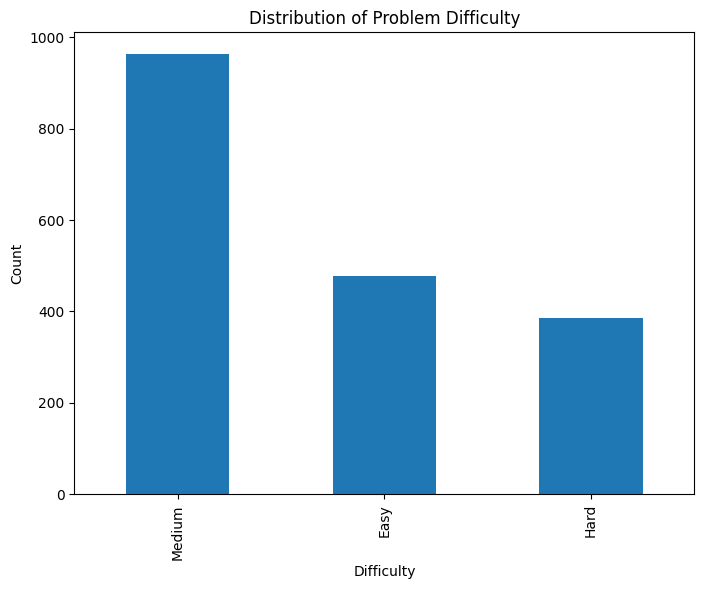

In [51]:
#Solution 13(your code here)
import matplotlib.pyplot as plt

# Plot the distribution of difficulty
difficulty_counts = leetcode_df['difficulty'].value_counts()
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar')
plt.title('Distribution of Problem Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count')
plt.show()


The bar plot shows the distribution of problem difficulty levels. It appears that:

- Medium difficulty problems are the most common.
- Easy and Hard difficulties have fewer problems compared to Medium.

### Question 14

#### Plot the distribution of acceptance_rate

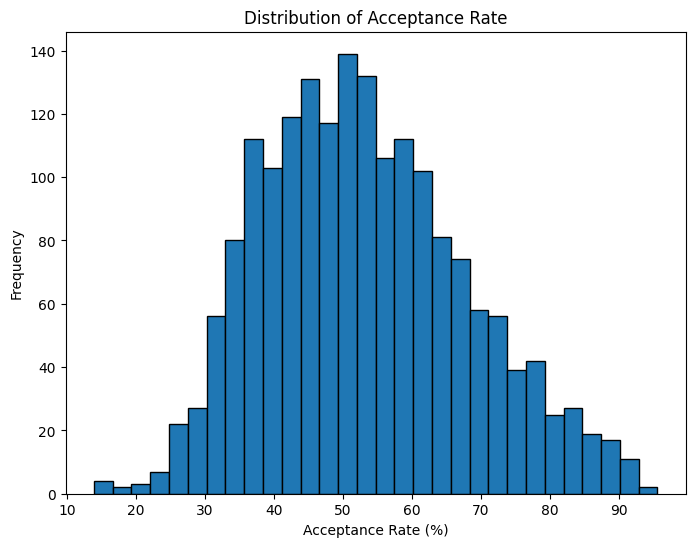

In [52]:
#Solution 14(your code here)
# Plot the distribution of acceptance_rate
plt.figure(figsize=(8, 6))
plt.hist(leetcode_df['acceptance_rate'], bins=30, edgecolor='black')
plt.title('Distribution of Acceptance Rate')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of acceptance rates. It appears that:

- Most problems have acceptance rates between 30% and 70%.
- There are fewer problems with very low or very high acceptance rates.

### Question 15

#### Plot the distribution of frequency

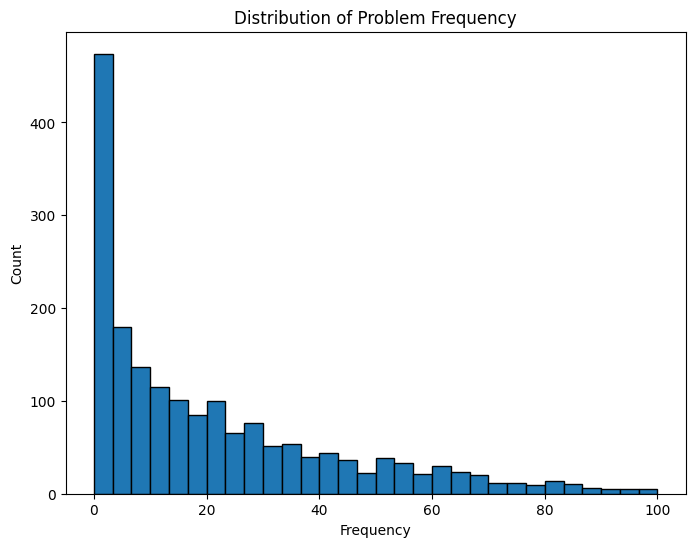

In [53]:
#Solution 15(your code here)
# Plot the distribution of frequency
plt.figure(figsize=(8, 6))
plt.hist(leetcode_df['frequency'], bins=30, edgecolor='black')
plt.title('Distribution of Problem Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of problem frequency. It appears that:

- A large number of problems have low frequency (close to 0).
- A small number of problems have very high frequency (close to 100).

### Question 16

#### Plot the Scatter plot of likes vs dislikes

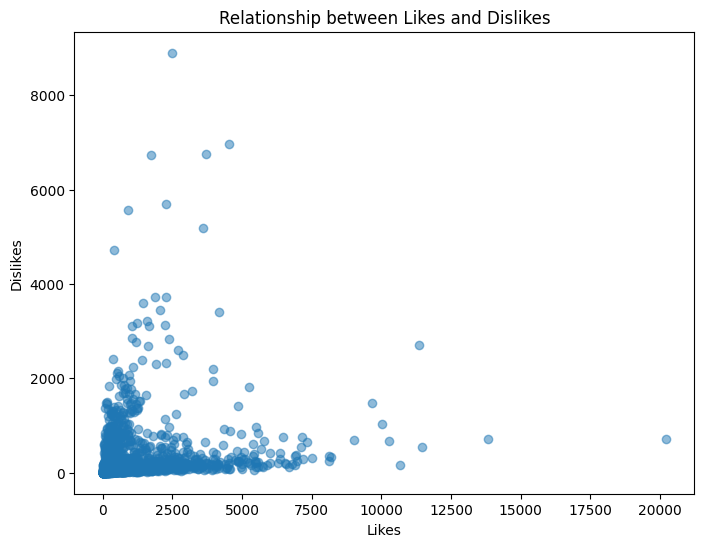

In [54]:
#Solution 16(your code here)
# Scatter plot of likes vs dislikes
plt.figure(figsize=(8, 6))
plt.scatter(leetcode_df['likes'], leetcode_df['dislikes'], alpha=0.5)
plt.title('Relationship between Likes and Dislikes')
plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

<Axes: xlabel='likes', ylabel='dislikes'>

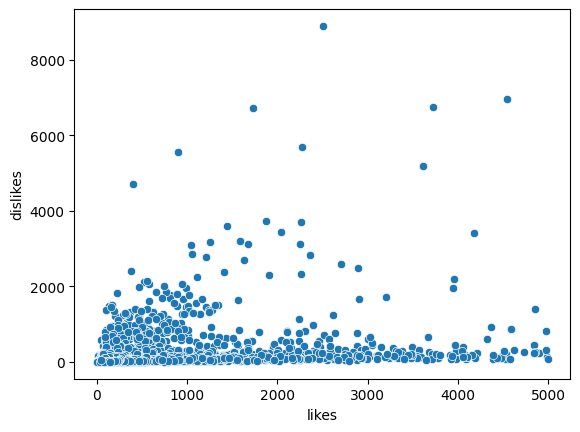

In [55]:
sns.scatterplot(data=leetcode_df[leetcode_df['likes'] < 5000], x='likes', y='dislikes')

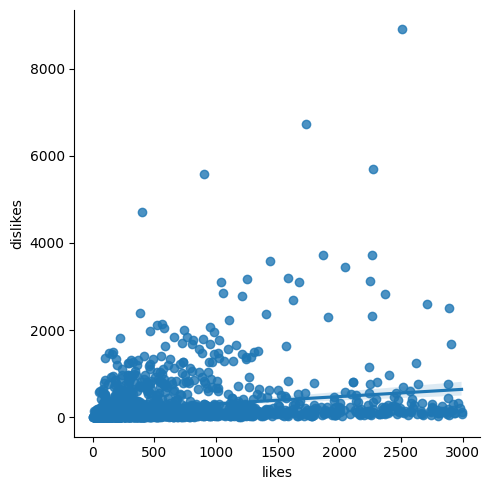

In [57]:
sns.lmplot(data=leetcode_df[leetcode_df['likes'] < 3000], x='likes', y='dislikes')

The scatter plot shows the relationship between likes and dislikes. It appears that:

- Problems with more likes tend to also have more dislikes.

### Question 17

#### Plot the Scatter plot of accepted vs submissions

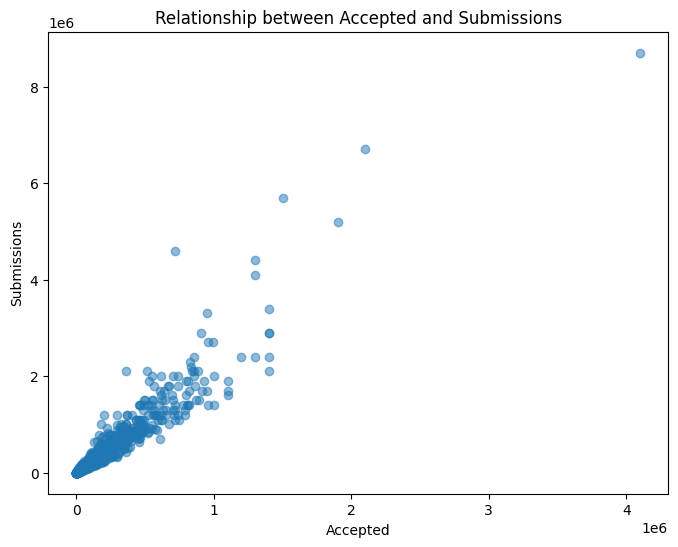

In [58]:
#Solution 17(your code here)
# Scatter plot of accepted vs submissions
plt.figure(figsize=(8, 6))
plt.scatter(leetcode_df['accepted'], leetcode_df['submissions'], alpha=0.5)
plt.title('Relationship between Accepted and Submissions')
plt.xlabel('Accepted')
plt.ylabel('Submissions')
plt.show()

The scatter plot shows the relationship between accepted and total submissions. It appears that:

- There is a strong positive correlation between the number of accepted submissions and total submissions.
- Problems with higher total submissions generally have higher accepted submissions.

### Question 18

#### Plot the Bar plot for average acceptance_rate by difficulty

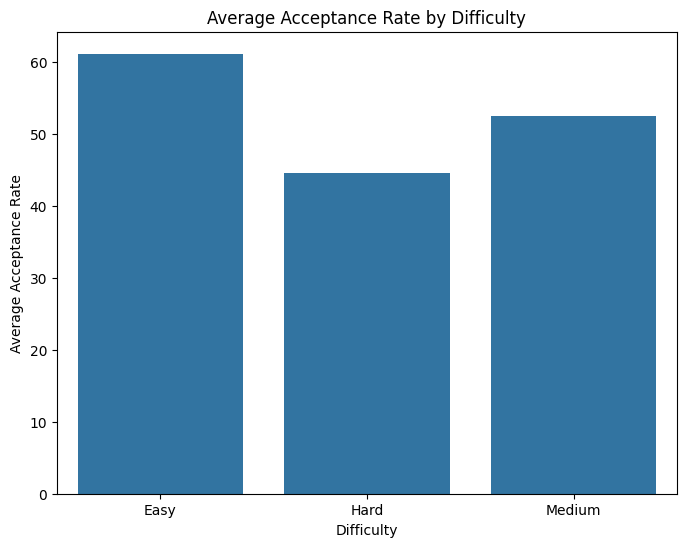

In [59]:
#Solution 18(your code here)
# Bar plot for average acceptance_rate by difficulty
plt.figure(figsize=(8, 6))
average_acceptance_rate = leetcode_df.groupby('difficulty')['acceptance_rate'].mean().reset_index()
sns.barplot(x='difficulty', y='acceptance_rate', data=average_acceptance_rate)
plt.title('Average Acceptance Rate by Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Average Acceptance Rate')
plt.show()

### Question 19

#### Plot

- scatter plot acceptance_rate vs frequency

In [66]:
leetcode_df[['accepted','submissions']].corr()

,accepted,submissions
accepted,1.000000,0.950464
submissions,0.950464,1.000000


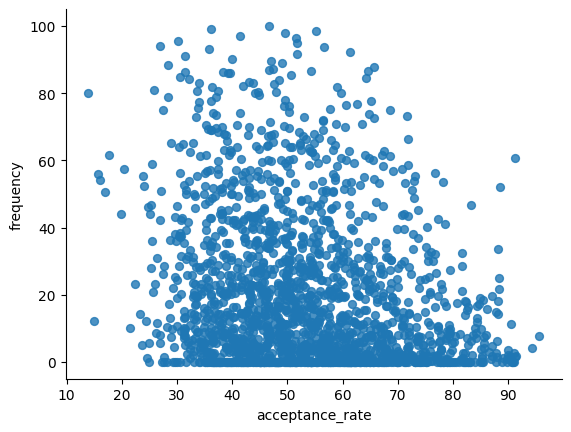

In [64]:
#Solution 19(your code here)
# acceptance_rate vs frequency

from matplotlib import pyplot as plt
leetcode_df.plot(kind='scatter', x='acceptance_rate', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From the scatter plot of acceptance rate versus frequency, we can infer the following observations:

- General Trend:
  - There is no clear linear relationship between acceptance rate and frequency. The points are widely scattered across the plot.
- Acceptance Rate Clustering:
  - A large number of problems have an acceptance rate below 50%. This suggests that many problems are challenging or not easily solvable by a majority of users.
- Frequency Range:
  - The frequency values vary significantly, with most points concentrated in a lower range and a few outliers indicating highly frequent problems.
- Outliers:
  - There are a few outliers with very high frequency values, which indicates that some problems are extremely common and likely well-known or popular among users.
- Distribution:
  - The points are dispersed throughout the lower half of the acceptance rate axis, indicating that problems with varying difficulty levels (as reflected by acceptance rates) can have a wide range of frequencies.